<a href="https://colab.research.google.com/github/Samuel442/Python/blob/main/Colab/Estatistica_com_Python_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [64]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [65]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)

#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `info`

In [66]:
dados = pd.read_csv(url)

In [67]:
dados.head()      # primeiras linhas

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


In [68]:
dados.shape       # linhas e colunas

(76840, 7)

In [69]:
dados.columns     # nomes das colunas

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos.de.Estudo', 'Renda', 'Altura'], dtype='object')

In [70]:
dados.info()      # tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [71]:
dados['UF'].nunique()

27

In [72]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [73]:
contagem_uf = dados['UF'].value_counts()
contagem_uf

,count
UF,
São Paulo,8544
Minas Gerais,7686
Rio Grande do Sul,6322
Bahia,5717
Rio de Janeiro,5556
Pará,4449
Paraná,4356
Pernambuco,3820
Goiás,3478


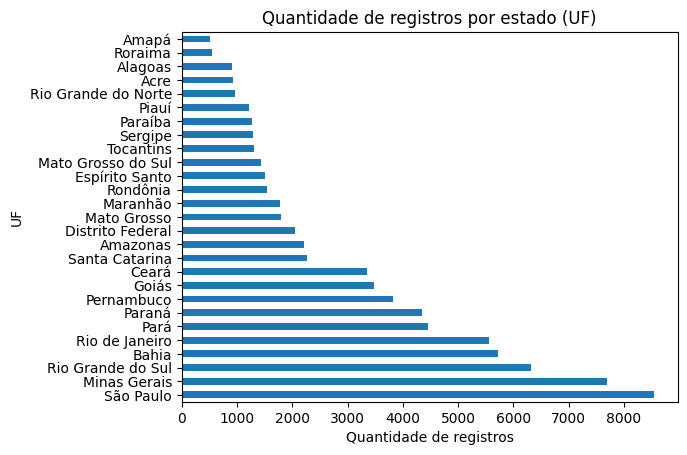

In [74]:
import matplotlib.pyplot as plt

plt.figure()
contagem_uf.plot(kind='barh')
plt.xlabel('Quantidade de registros')
plt.ylabel('UF')
plt.title('Quantidade de registros por estado (UF)')
plt.show()

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [75]:
# Definindo as variáveis
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

##### Sexo

In [76]:
dados['Sexo'] = dados['Sexo'].map(sexo).astype('category')

In [77]:
dados_tratados = pd.get_dummies(
    dados,
    columns=['Sexo', 'Cor'],
    drop_first=False
)


In [78]:
colunas_bool = dados_tratados.select_dtypes(include='bool').columns
dados_tratados[colunas_bool] = dados_tratados[colunas_bool].astype(int)

##### Cor

In [79]:
dados['Cor'] = dados['Cor'].map(cor).astype('category')

##### Anos de Estudo

In [80]:
dados['Anos.de.Estudo'] = dados['Anos.de.Estudo'].map(anos_de_estudo)

In [81]:
ordem_estudo = list(anos_de_estudo.values())

dados['Anos.de.Estudo'] = pd.Categorical(
    dados['Anos.de.Estudo'].replace(anos_de_estudo),
    categories=ordem_estudo,
    ordered=True
)

dados['Anos.de.Estudo_ord'] = dados['Anos.de.Estudo'].cat.codes


In [82]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Anos.de.Estudo_ord
0,Rondônia,Masculino,23,Parda,11 anos,800,1.60,11
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.74,11
2,Rondônia,Feminino,35,Parda,14 anos,880,1.76,14
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.78,5
4,Rondônia,Feminino,47,Parda,8 anos,150,1.69,8


In [83]:
dados_tratados

,UF,Idade,Anos.de.Estudo,Renda,Altura,Sexo_Feminino,Sexo_Masculino,Cor_0,Cor_2,Cor_4,Cor_6,Cor_8
0,Rondônia,23,12,800,1.60,0,1,0,0,0,0,1
1,Rondônia,23,12,1150,1.74,1,0,0,1,0,0,0
2,Rondônia,35,15,880,1.76,1,0,0,0,0,0,1
3,Rondônia,46,6,3500,1.78,0,1,0,1,0,0,0
4,Rondônia,47,9,150,1.69,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,46,11,812,1.69,1,0,0,1,0,0,0
76836,Distrito Federal,30,7,1500,1.79,0,1,0,0,1,0,0
76837,Distrito Federal,32,12,1300,1.83,0,1,0,0,0,0,1
76838,Distrito Federal,57,4,1500,1.73,0,1,0,0,0,0,1


#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [84]:
menor_renda = dados['Renda'].min()
maior_renda = dados['Renda'].max()

print(f"A menor renda da base de dados é {menor_renda:.2f} e a maior renda é {maior_renda:.2f}.")

A menor renda da base de dados é 0.00 e a maior renda é 200000.00.


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [85]:
tabela_freq = (
    dados['Sexo']
    .value_counts()
    .reset_index()
)

tabela_freq.columns = ['Sexo', 'Frequência']

tabela_freq['Porcentagem (%)'] = (
    tabela_freq['Frequência'] / tabela_freq['Frequência'].sum()
) * 100

tabela_freq


,Sexo,Frequência,Porcentagem (%)
0,Masculino,53250,69.299844
1,Feminino,23590,30.700156


In [86]:

freq_abs = pd.crosstab(
    dados['Sexo'],   # Cat.Sexo
    dados['Cor']     # Cat.Cor
)

freq_abs

freq_rel = pd.crosstab(
    dados['Sexo'],
    dados['Cor'],
    normalize='all'
) * 100

freq_rel
freq_rel.round(2)


Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.15,12.52,0.13,14.14,3.76
Masculino,0.31,28.88,0.33,32.62,7.16


#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [87]:
tabela_renda_media = pd.pivot_table(
    dados,
    values='Renda',
    index='Sexo',
    columns='Cor',
    aggfunc='mean'
)

tabela_renda_media


/tmp/ipython-input-1301057584.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabela_renda_media = pd.pivot_table(


Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,3027.341880,2109.866750,2464.386139,1176.758516,1134.596400
Masculino,4758.251064,2925.744435,1081.710938,1659.577425,1603.861687


> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [88]:
media_renda = dados['Renda'].mean()
mediana_renda = dados['Renda'].median()
moda_renda = dados['Renda'].mode()

print(f"Média da renda: R$ {media_renda:.2f}")
print(f"Mediana da renda: R$ {mediana_renda:.2f}")
print("Moda(s) da renda:")
print(moda_renda)


Média da renda: R$ 2000.38
Mediana da renda: R$ 1200.00
Moda(s) da renda:
0    788
Name: Renda, dtype: int64


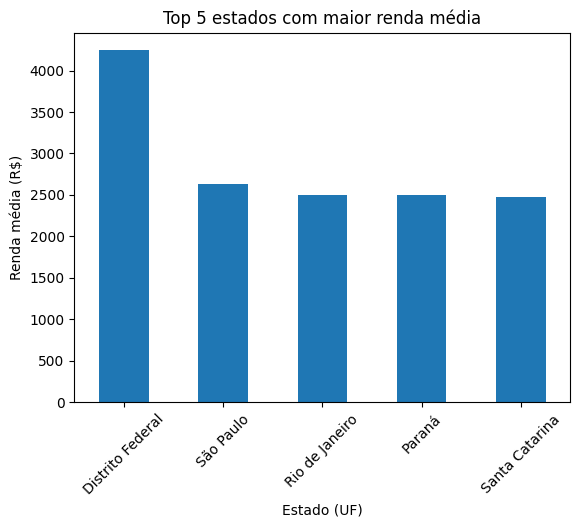

In [89]:
media_renda_uf = (
    dados
    .groupby('UF')['Renda']
    .mean()
    .sort_values(ascending=False)
)
top5_uf = media_renda_uf.head(5)
top5_uf


plt.figure()
top5_uf.plot(kind='bar')
plt.ylabel('Renda média (R$)')
plt.xlabel('Estado (UF)')
plt.title('Top 5 estados com maior renda média')
plt.xticks(rotation=45)
plt.show()



/tmp/ipython-input-4169433460.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabela_media = pd.pivot_table(
/tmp/ipython-input-4169433460.py:20: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabela_mediana = pd.pivot_table(


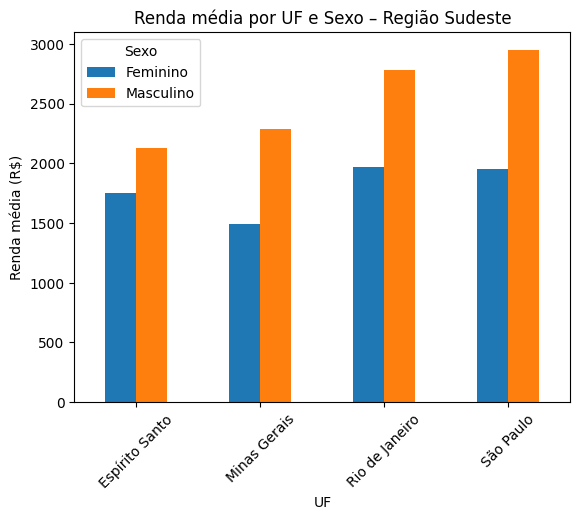

In [90]:
ufs_sudeste = [
    'Espírito Santo',
    'Minas Gerais',
    'Rio de Janeiro',
    'São Paulo'
]

dados_sudeste = dados[dados['UF'].isin(ufs_sudeste)]

tabela_media = pd.pivot_table(
    dados_sudeste,
    values='Renda',
    index='UF',
    columns='Sexo',
    aggfunc='mean'
)

tabela_media

tabela_mediana = pd.pivot_table(
    dados_sudeste,
    values='Renda',
    index='UF',
    columns='Sexo',
    aggfunc='median'
)

tabela_mediana

tabela_media.plot(kind='bar')
plt.ylabel('Renda média (R$)')
plt.title('Renda média por UF e Sexo – Região Sudeste')
plt.xticks(rotation=45)
plt.show()


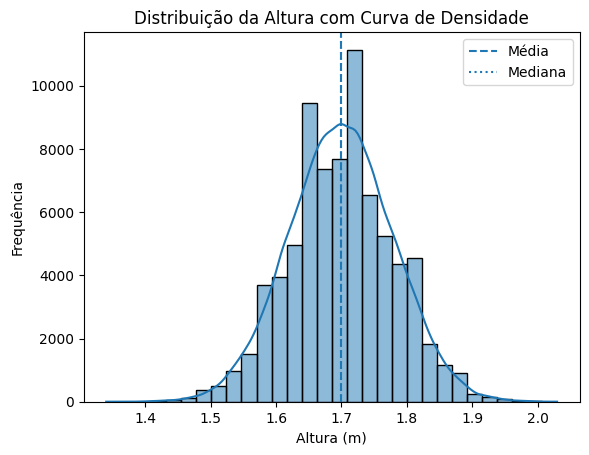

In [91]:
mtc = pd.DataFrame({
    'Variável': ['Altura', 'Idade'],
    'Média': [dados['Altura'].mean(), dados['Idade'].mean()],
    'Mediana': [dados['Altura'].median(), dados['Idade'].median()],
    'Moda': [
        dados['Altura'].mode()[0],
        dados['Idade'].mode()[0]
    ]
})

mtc

plt.figure()
sns.histplot(
    dados['Altura'],
    bins=30,
    kde=True
)
plt.axvline(dados['Altura'].mean(), linestyle='--', label='Média')
plt.axvline(dados['Altura'].median(), linestyle=':', label='Mediana')
plt.title('Distribuição da Altura com Curva de Densidade')
plt.xlabel('Altura (m)')
plt.ylabel('Frequência')
plt.legend()
plt.show()


#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize a função `head()` passando como variável quantos valores deseja apresentar.

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

##### **Média**

##### **Mediana**

##### **Renda Máxima**

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

> #### Conclusões

Escreva suas conclusões aqui...

##### **Idade**

> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [92]:
renda_15k = dados[dados['Renda'] <= 15000]

In [93]:
n = renda_15k.shape[0]
n


76219

In [94]:
import numpy as np

k = 1 + 3.322 * np.log10(n)
k


np.float64(17.21821410484521)

In [95]:
k = int(round(k))
k


17

#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



In [96]:
min_renda = renda_15k['Renda'].min()
max_renda = renda_15k['Renda'].max()

classes = np.linspace(min_renda, max_renda, k + 1)
classes


array([    0.        ,   882.35294118,  1764.70588235,  2647.05882353,
        3529.41176471,  4411.76470588,  5294.11764706,  6176.47058824,
        7058.82352941,  7941.17647059,  8823.52941176,  9705.88235294,
       10588.23529412, 11470.58823529, 12352.94117647, 13235.29411765,
       14117.64705882, 15000.        ])

In [97]:
renda_15k['Faixa_Renda'] = pd.cut(
    renda_15k['Renda'],
    bins=classes,
    include_lowest=True
)


/tmp/ipython-input-2040184200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_15k['Faixa_Renda'] = pd.cut(


In [98]:
freq_abs = renda_15k['Faixa_Renda'].value_counts().sort_index()
freq_abs


,count
Faixa_Renda,
"(-0.001, 882.353]",26311
"(882.353, 1764.706]",25816
"(1764.706, 2647.059]",10905
"(2647.059, 3529.412]",4854
"(3529.412, 4411.765]",2133
"(4411.765, 5294.118]",2180
"(5294.118, 6176.471]",1002
"(6176.471, 7058.824]",672
"(7058.824, 7941.176]",208


In [99]:
freq_rel = (freq_abs / freq_abs.sum()) * 100

tabela_freq = pd.DataFrame({
    'Frequência Absoluta': freq_abs,
    'Frequência Relativa (%)': freq_rel
})

tabela_freq


,Frequência Absoluta,Frequência Relativa (%)
Faixa_Renda,,
"(-0.001, 882.353]",26311,34.520264
"(882.353, 1764.706]",25816,33.870820
"(1764.706, 2647.059]",10905,14.307456
"(2647.059, 3529.412]",4854,6.368491
"(3529.412, 4411.765]",2133,2.798515
"(4411.765, 5294.118]",2180,2.860179
"(5294.118, 6176.471]",1002,1.314633
"(6176.471, 7058.824]",672,0.881670
"(7058.824, 7941.176]",208,0.272898


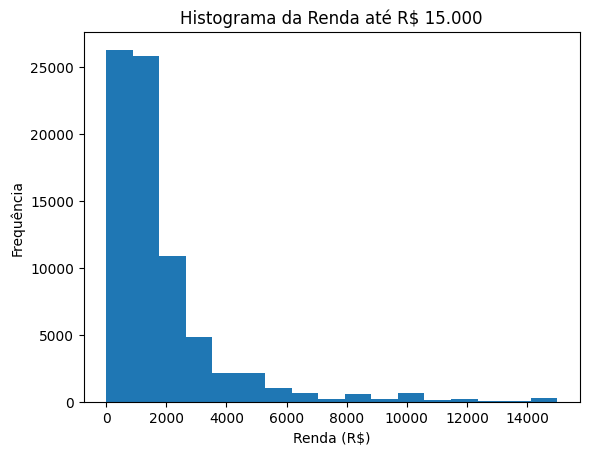

In [100]:
plt.figure()
plt.hist(
    renda_15k['Renda'],
    bins=classes
)
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.title('Histograma da Renda até R$ 15.000')
plt.show()


In [101]:
# até um salário
ate_salario_min = dados[dados['Renda'] <= 788]

percentual = (ate_salario_min.shape[0] / dados.shape[0]) * 100
percentual
print(f"{percentual:.2f}% das pessoas responsáveis ganhavam até um salário mínimo em 2015.")


28.87% das pessoas responsáveis ganhavam até um salário mínimo em 2015.


In [102]:
# renda max de 95% das pessoas
renda_p95 = dados['Renda'].quantile(0.95)
renda_p95


np.float64(6000.0)

In [103]:
# renda min dos 1%
renda_p99 = dados['Renda'].quantile(0.99)
renda_p99


np.float64(15000.0)

In [104]:
# até 6000
renda_6k = dados[dados['Renda'] <= 6000]

In [105]:
percentis_6k = renda_6k['Renda'].quantile([0.25, 0.50, 0.75])
percentis_6k

,Renda
0.25,788.0
0.50,1200.0
0.75,2000.0


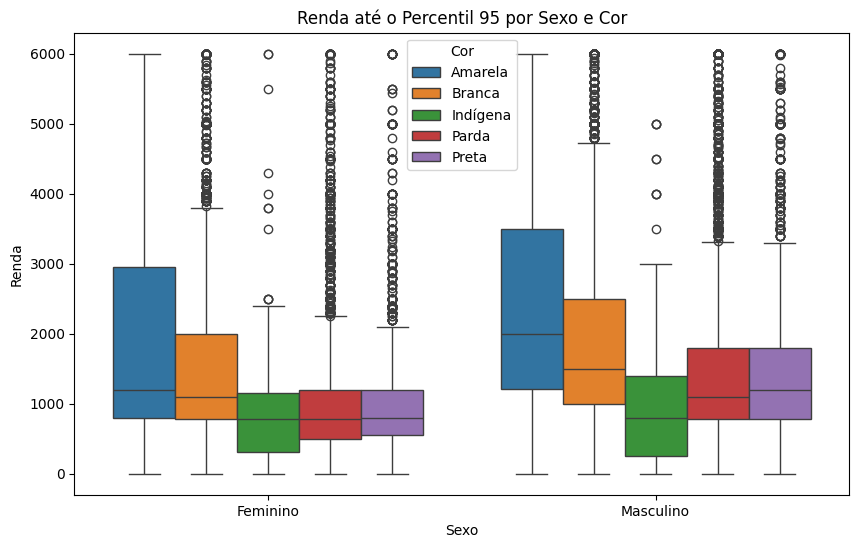

In [106]:
p95 = dados['Renda'].quantile(0.95)
renda_95 = dados[dados['Renda'] <= p95]


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(
    data=renda_95,
    x='Sexo',
    y='Renda',
    hue='Cor'
)

plt.title('Renda até o Percentil 95 por Sexo e Cor')
plt.show()


In [107]:
# idade limite 20% da população
idade_limite_20 = dados['Idade'].quantile(0.20)
idade_limite_20


np.float64(33.0)

In [108]:
pessoas_20 = dados[dados['Idade'] <= idade_limite_20]
len(pessoas_20)


17092

In [109]:
pessoas_20['Idade'].tail()


,Idade
76820,27
76821,20
76833,30
76836,30
76837,32


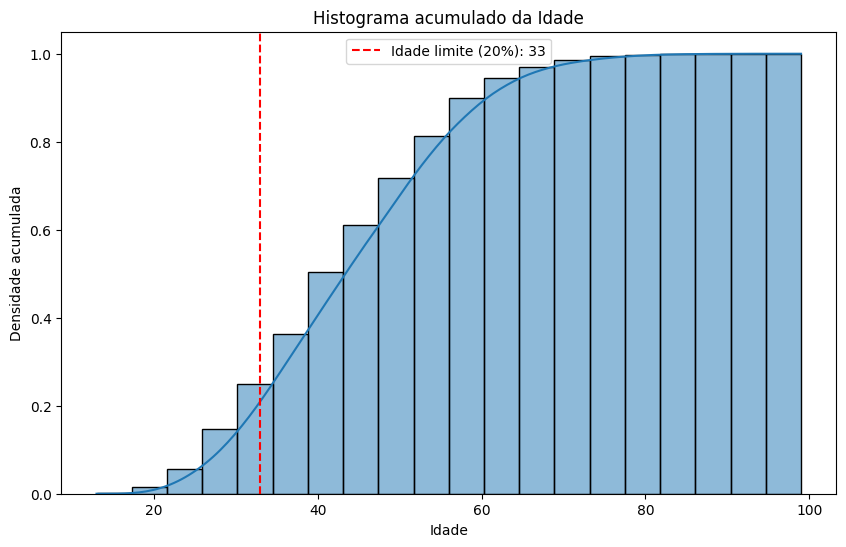

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.histplot(
    dados['Idade'],
    bins=20,
    stat='density',
    cumulative=True,
    kde=True
)

plt.axvline(
    idade_limite_20,
    color='red',
    linestyle='--',
    label=f'Idade limite (20%): {idade_limite_20:.0f}'
)

plt.legend()
plt.title('Histograma acumulado da Idade')
plt.xlabel('Idade')
plt.ylabel('Densidade acumulada')

plt.show()


> #### Conclusões

Escreva suas conclusões aqui...

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `hue` da seguinte maneira: `(x = Renda, y = Cat.Cor, hue = Cat.Sexo)`.

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [111]:
import numpy as np

media_renda = dados['Renda'].mean()

desvio_medio_absoluto = np.mean(
    np.abs(dados['Renda'] - media_renda)
)

desvio_medio_absoluto


np.float64(1526.4951371638058)

In [112]:
variancia = dados['Renda'].var()
variancia


11044906.00622118

In [113]:
desvio_padrao = dados['Renda'].std()
desvio_padrao


3323.3877303470294

In [114]:
print(f'''
Desvio médio absoluto da renda: R$ {desvio_medio_absoluto:,.2f}
Variância da renda: {variancia:,.2f}
Desvio padrão da renda: R$ {desvio_padrao:,.2f}
''')



Desvio médio absoluto da renda: R$ 1,526.50
Variância da renda: 11,044,906.01
Desvio padrão da renda: R$ 3,323.39



##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [115]:
tabela_renda_estudo = (
    dados
    .groupby('Anos.de.Estudo')['Renda']
    .agg(['mean', 'median', 'std'])
    .round(2)
)

tabela_renda_estudo

/tmp/ipython-input-3789488551.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Anos.de.Estudo')['Renda']


,mean,median,std
Anos.de.Estudo,,,
Sem instrução e menos de 1 ano,732.99,600.0,955.27
1 ano,806.52,700.0,1203.87
2 anos,842.56,788.0,1298.87
3 anos,980.04,788.0,1907.14
4 anos,1150.44,900.0,1293.14
5 anos,1183.58,940.0,1328.71
6 anos,1284.08,1000.0,1326.14
7 anos,1289.17,1000.0,1279.41
8 anos,1437.74,1100.0,1404.28


In [116]:
tabela_renda_estudo.columns = ['Media_Renda', 'Mediana_Renda', 'Desvio_Padrao']
tabela_renda_estudo


,Media_Renda,Mediana_Renda,Desvio_Padrao
Anos.de.Estudo,,,
Sem instrução e menos de 1 ano,732.99,600.0,955.27
1 ano,806.52,700.0,1203.87
2 anos,842.56,788.0,1298.87
3 anos,980.04,788.0,1907.14
4 anos,1150.44,900.0,1293.14
5 anos,1183.58,940.0,1328.71
6 anos,1284.08,1000.0,1326.14
7 anos,1289.17,1000.0,1279.41
8 anos,1437.74,1100.0,1404.28


> #### Conclusões

O desvio médio absoluto indica que, em média, a renda das pessoas responsáveis se afasta da renda média em aproximadamente R$ 1,526.50.
A variância evidencia uma alta dispersão dos dados, reflexo da desigualdade de renda observada na amostra.
O desvio padrão reforça esse comportamento, mostrando que as rendas variam significativamente em torno da média, o que sugere a presença de valores elevados e assimetria na distribuição.

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [117]:
dados_15k = dados[dados['Renda'] <= 15000]


In [118]:
tabela_renda_sexo = (
    dados_15k
    .groupby('Sexo')['Renda']
    .agg(['mean', 'median', 'std'])
    .round(2)
)

tabela_renda_sexo


/tmp/ipython-input-2730609839.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Sexo')['Renda']


,mean,median,std
Sexo,,,
Feminino,1460.14,900.0,1763.69
Masculino,1964.35,1300.0,2101.16


In [119]:
tabela_renda_sexo.columns = ['Media_Renda', 'Mediana_Renda', 'Desvio_Padrao']
tabela_renda_sexo


,Media_Renda,Mediana_Renda,Desvio_Padrao
Sexo,,,
Feminino,1460.14,900.0,1763.69
Masculino,1964.35,1300.0,2101.16


> #### Conclusões

Ao analisar a renda das pessoas responsáveis pelo domicílio até R$ 15.000 por sexo biológico, observa-se que a média e a mediana da renda masculina são superiores às da renda feminina, evidenciando uma desigualdade de rendimentos entre os sexos.

Além disso, o desvio padrão maior entre os homens indica maior dispersão dos valores de renda, enquanto a renda feminina apresenta menor variabilidade, sugerindo maior concentração em faixas salariais mais baixas.

Mesmo após a exclusão de rendas muito elevadas, as diferenças permanecem, o que reforça a desigualdade salarial por sexo no conjunto de dados analisado.

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [120]:
ufs_centro_oeste = [
    'Goiás',
    'Distrito Federal',
    'Mato Grosso',
    'Mato Grosso do Sul',
    'Tocantins'
]

dados_co_10k = dados[
    (dados['UF'].isin(ufs_centro_oeste)) &
    (dados['Renda'] <= 10000)
]


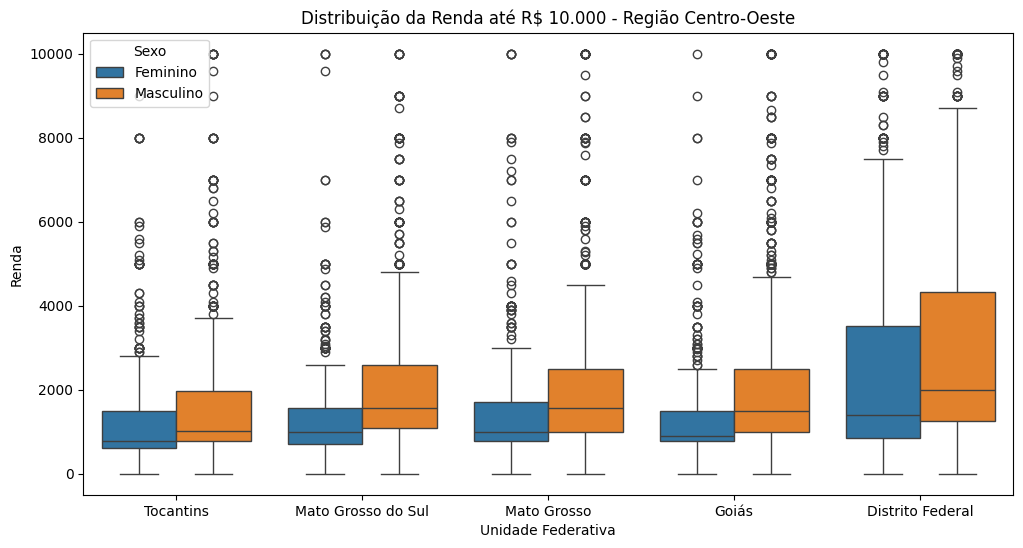

In [121]:
plt.figure(figsize=(12,6))

sns.boxplot(
    data=dados_co_10k,
    x='UF',
    y='Renda',
    hue='Sexo'
)

plt.title('Distribuição da Renda até R$ 10.000 - Região Centro-Oeste')
plt.xlabel('Unidade Federativa')
plt.ylabel('Renda')
plt.show()


##### **Média**

In [122]:
media_renda = (
    dados_co_10k
    .groupby(['UF', 'Sexo'])['Renda']
    .mean()
    .round(2)
    .unstack()
)

media_renda


/tmp/ipython-input-4251313024.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['UF', 'Sexo'])['Renda']


Sexo,Feminino,Masculino
UF,,
Distrito Federal,2551.87,3138.46
Goiás,1284.65,2030.06
Mato Grosso,1548.93,2092.10
Mato Grosso do Sul,1396.69,2181.73
Tocantins,1381.80,1598.92


##### **Mediana**

In [123]:
mediana_renda = (
    dados_co_10k
    .groupby(['UF', 'Sexo'])['Renda']
    .median()
    .round(2)
    .unstack()
)

mediana_renda


/tmp/ipython-input-2069025654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['UF', 'Sexo'])['Renda']


Sexo,Feminino,Masculino
UF,,
Distrito Federal,1400.0,2000.0
Goiás,900.0,1500.0
Mato Grosso,1000.0,1560.0
Mato Grosso do Sul,986.0,1576.0
Tocantins,788.0,1020.0


##### **Desvio Padrão**

In [124]:
desvio_padrao_renda = (
    dados_co_10k
    .groupby(['UF', 'Sexo'])['Renda']
    .std()
    .round(2)
    .unstack()
)

desvio_padrao_renda


/tmp/ipython-input-560010338.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['UF', 'Sexo'])['Renda']


Sexo,Feminino,Masculino
UF,,
Distrito Federal,2451.17,2513.43
Goiás,1110.00,1587.38
Mato Grosso,1508.59,1707.91
Mato Grosso do Sul,1400.90,1773.44
Tocantins,1516.37,1632.05


> #### Conclusões

A análise da renda das pessoas responsáveis pelo domicílio na Região Centro-Oeste, considerando valores até R$ 10.000 e segmentação por sexo biológico, mostra diferenças relevantes entre os estados e entre os sexos.

Em geral, observa-se que os homens apresentam médias e medianas de renda superiores às das mulheres na maioria dos estados analisados. O boxplot evidencia também maior dispersão da renda masculina, refletida em desvios padrão mais elevados, enquanto a renda feminina tende a ser mais concentrada em faixas inferiores.

Entre os estados, o Distrito Federal se destaca por apresentar os maiores valores centrais de renda, enquanto estados como Tocantins e Mato Grosso do Sul apresentam distribuições mais concentradas e valores medianos menores. Esses resultados reforçam a existência de desigualdades regionais e de gênero na distribuição da renda.